In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

### Create image data generator

In [2]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [3]:
test_datagen = ImageDataGenerator(rescale=1/255)

## Read images

In [4]:
train = train_datagen.flow_from_directory('C:/Users/Administrator.DAI-PC2/NLP and CV/fruits/training_set',
                                         target_size=(64,64),
                                         class_mode='binary')  #if only 2 class use binary
                                                            #if more than 2 use category

Found 13 images belonging to 2 classes.


In [5]:
train.filenames

['apple\\1.jpg',
 'apple\\2.jpeg',
 'apple\\3.jpeg',
 'apple\\4.jpeg',
 'apple\\5.jpg',
 'apple\\6.jpg',
 'apple\\7.jpg',
 'orange\\1.jpeg',
 'orange\\2.jpg',
 'orange\\3.jpeg',
 'orange\\4.jpeg',
 'orange\\5.jpg',
 'orange\\6.jpg']

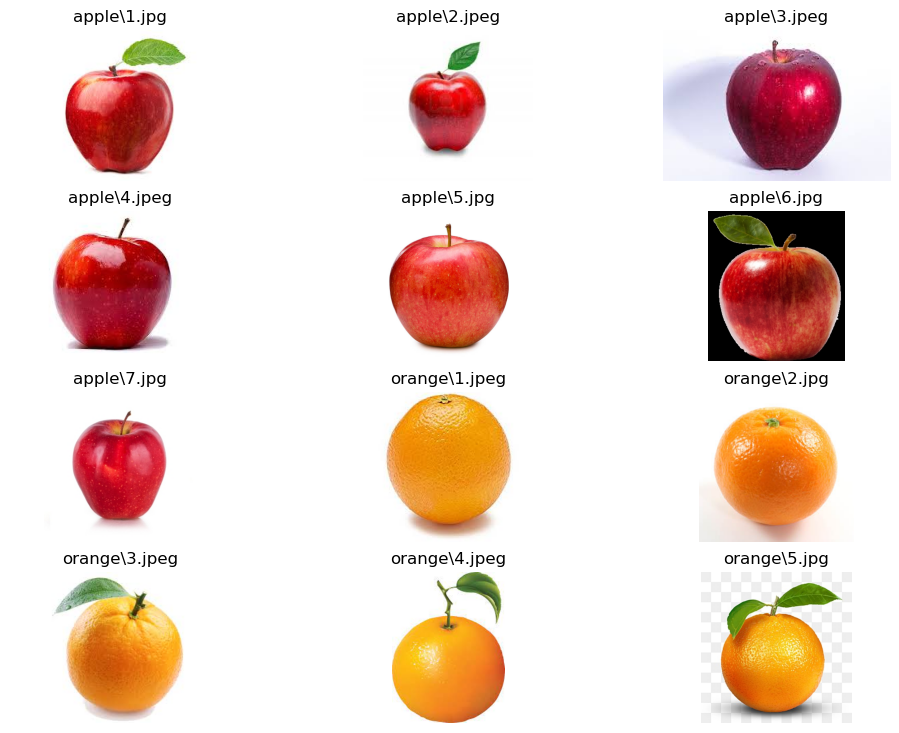

In [6]:
i = 1
plt.figure(figsize=(12,9))
for fname in train.filenames:
    if i == 13:
        break
    img = plt.imread(train.directory + "/" + fname)
    plt.subplot(4,3,i)
    plt.axis('off')
    i+=1
    plt.title(fname.split('/')[0])   # to give labels
    plt.imshow(img)

In [7]:
test = test_datagen.flow_from_directory('C:/Users/Administrator.DAI-PC2/NLP and CV/fruits/test_set',
                                         target_size=(64,64),
                                         class_mode='binary')  #if only 2 class use binary
                                                            #if more than 2 use category

Found 6 images belonging to 2 classes.


In [8]:
test.filenames

['apple\\1.jpg',
 'apple\\2.jpeg',
 'apple\\3.jpg',
 'orange\\1.jpg',
 'orange\\2.jpg',
 'orange\\3.jpg']

### Build the CNN Model

In [9]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(64,64,3), 
                                             activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
 
    
model.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=(64,64,3), 
                                             activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 16)                2

In [11]:
# Compile Model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
train.class_indices   # assign label alphabetically

{'apple': 0, 'orange': 1}

In [13]:
# Train model
model.fit(train, epochs=20, validation_data=test)

Epoch 1/20


1/1 [==============================] - 2s 2s/step - loss: 0.6888 - accuracy: 0.5385 - val_loss: 0.6523 - val_accuracy: 1.0000
Epoch 2/20
1/1 [==============================] - 0s 228ms/step - loss: 0.6727 - accuracy: 0.8462 - val_loss: 0.6373 - val_accuracy: 0.6667
Epoch 3/20
1/1 [==============================] - 0s 182ms/step - loss: 0.6459 - accuracy: 0.6923 - val_loss: 0.6199 - val_accuracy: 0.6667
Epoch 4/20
1/1 [==============================] - 0s 156ms/step - loss: 0.6278 - accuracy: 0.6923 - val_loss: 0.5981 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 179ms/step - loss: 0.6051 - accuracy: 0.6154 - val_loss: 0.5735 - val_accuracy: 0.6667
Epoch 6/20
1/1 [==============================] - 0s 180ms/step - loss: 0.5889 - accuracy: 0.6154 - val_loss: 0.5446 - val_accuracy: 0.6667
Epoch 7/20
1/1 [==============================] - 0s 181ms/step - loss: 0.5497 - accuracy: 0.6923 - val_loss: 0.5085 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=====

### Predict on new image

In [14]:
import cv2

In [23]:
# Read image 
img=plt.imread("C:/Users/Administrator.DAI-PC2/NLP and CV/fruits/sample1.jpg")


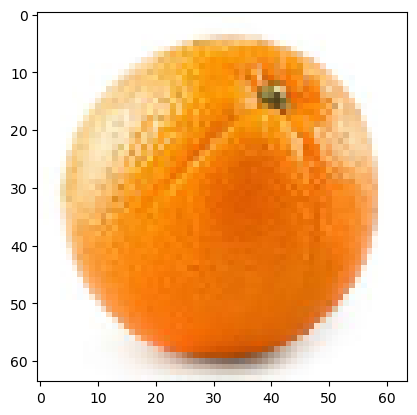

In [24]:
img = cv2.resize(img,(64,64))
plt.imshow(img)

In [32]:
# Predict the image
img = img.reshape(1,64,64,3)
model.predict(img)[0][0]

1/1 [==============================] - 0s 26ms/step


1.0

1/1 [==============================] - 0s 17ms/step


0.0

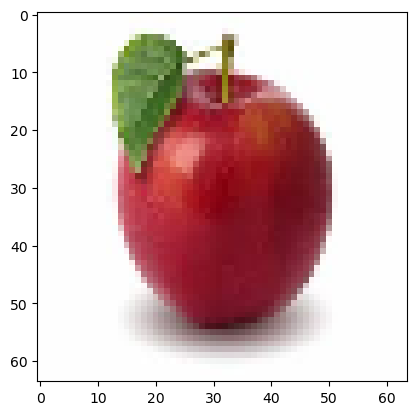

In [35]:
# Read image 
img1=plt.imread("C:/Users/Administrator.DAI-PC2/NLP and CV/fruits/sample2.jpg")
img1 = cv2.resize(img1,(64,64))
plt.imshow(img1)

# Predict the image
img1 = img1.reshape(1,64,64,3)
model.predict(img1)[0][0]

In [36]:
train.class_indices

{'apple': 0, 'orange': 1}